<a href="https://colab.research.google.com/github/morse129/ai-science-training-series/blob/main/2022-9-21_NickMorse_Homework_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1 submission
Nick Morse
morse129@umn.edu

Problem statement: Follow the example from the previous notebook Linear Regression using SGD and build a loop that properly finds the centers of the 4 clusters using k-means.

Import toolkits

(400, 2) (400,) (4, 2)


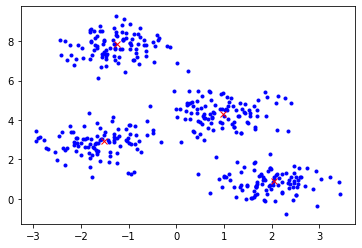

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

Define functions for k-means

In [4]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [5]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

Initialize cluster

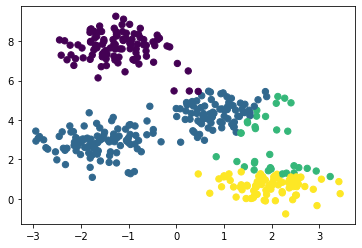

In [6]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

The k-means algorithm is implemented in a loop. The points are colored according to their associated centroid (label) and their centroid position is shown with a red 'x'. The true centroid position of the original clusters is shown with a red 'o'.

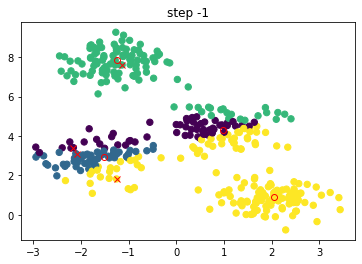

accuracy:  0.24


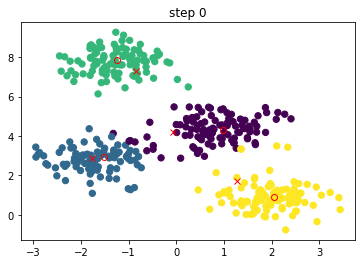

accuracy:  0.25


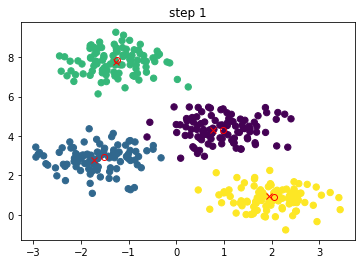

accuracy:  0.25


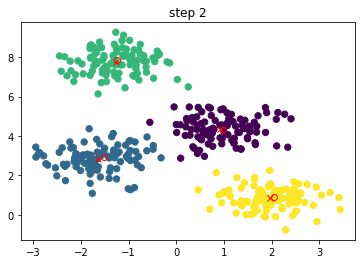

point labels unchanged as of step 3


In [8]:
delta = 0.01

maxsteps = 100

last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'ro', mfc='none')
plt.plot(last_centroids[:,0],last_centroids[:,1],'rx')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
#ipydis.clear_output(wait=True)

for step in range(maxsteps):

    centroids = get_new_centroids(x,last_labels,N)
    labels = assign_labels(x,centroids)

    # test if centroids have stopped moving
    if np.all(np.abs(last_centroids - centroids) < delta):
      print('centroids unchanged as of step %d' % step)
      # done
      break
    elif np.all(labels == last_labels):
      print('point labels unchanged as of step %d' % step)
      # done
      break
    else:
      last_labels = labels
      last_centroids = centroids

    # we can use the "truth" labels, cluster_labels to see how well we are doing
    # accuracy: # of points correctly labeled / total number of points
    accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
    print('accuracy: ',accuracy)
    plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
    plt.plot(cluster_centers[:,0],cluster_centers[:,1],'ro', mfc='none')
    plt.plot(centroids[:,0],centroids[:,1],'rx')
    plt.title('step %d' % step)
    plt.show()